![](../images/6-step-ml-framework.png)

# Predicting heart disease using maching learning

This notebook looks using Python-based machine learning and data science libraries in an attempt build a machine learning model capable of predicting whether or not someone has disease based on their medical attibutes.

We are going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Feature
5. Modeling
6. Experimentation

## 1. Problem definition

In a statement
> Giving clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original dataset came from the Cleveland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## 3. Evaluation

> If we can reach 95% of accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## 4. Features

**Create a data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We are going to use pandas, matplotlib and numpy for data analysis and manipulations

In [1]:
# Import all the tools we need


# Regular  EDA(Explaratory Data Analysis)  and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# the plots will appear inside the notebook
%matplotlib inline 

# Models form Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv('../data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape # rows, columns

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working on.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers ans why should you care about them?
5. How can you add, change or remove features to get more out your data?

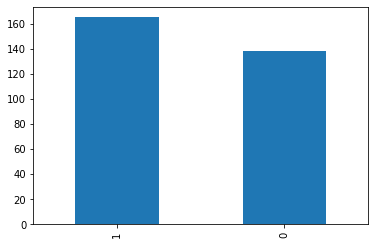

In [4]:
# Let's find out how many of each class there
df.target.value_counts().plot.bar()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Is there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Fequency according the Sex

In [8]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
# Compare target column with target column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


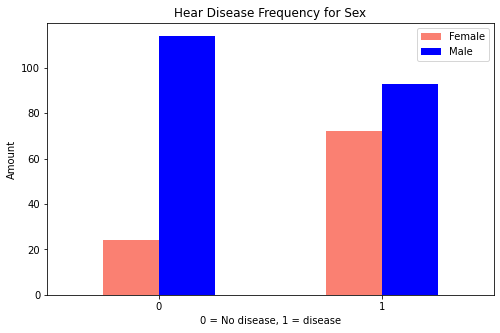

In [10]:
# create a plot to visualize the relation between the target and sex using crosstab

pd.crosstab(df.target, df.sex).plot(kind='bar', 
                                    color=['salmon','blue'], 
                                    figsize=(8,5))

plt.title('Hear Disease Frequency for Sex')
plt.xlabel('0 = No disease, 1 = disease')
plt.ylabel('Amount')
plt.xticks(rotation = 0)
plt.legend(['Female','Male'])
plt.show()

## Age vs Max Heart Rate for Heart Disease

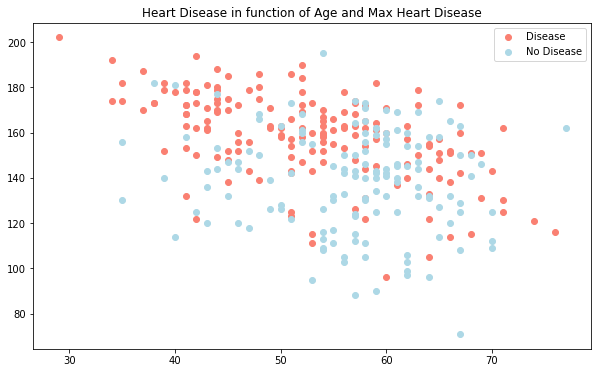

In [11]:
# create anoter figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df['age'][df['target'] == 1], 
            df['thalach'][df['target'] == 1],
            c='salmon')

# Scatter with negative examples
plt.scatter(df['age'][df['target'] == 0], 
            df['thalach'][df['target'] == 0],
            c='lightblue')

# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Disease')
plt.legend(['Disease', 'No Disease'])

plt.show()

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


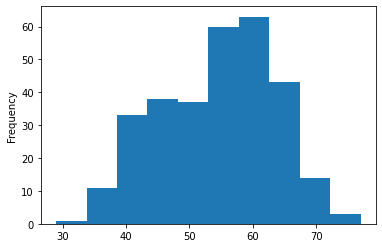

In [13]:
# Check the distribution of the age column with a histogram
df['age'].plot(kind='hist')
plt.show()

## Heart Disease Frequency per Chest Pain Type

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


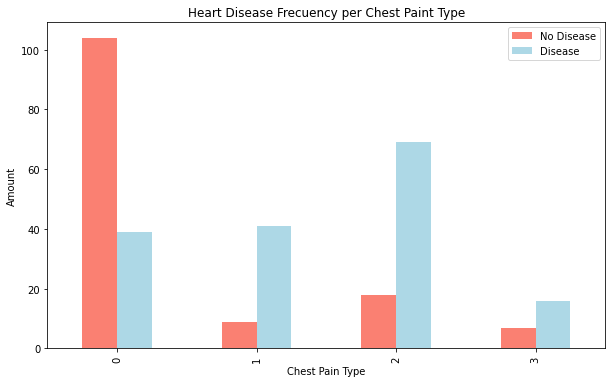

In [15]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6), 
                                   color=['salmon','lightblue'])
plt.title('Heart Disease Frecuency per Chest Paint Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.show()

In [16]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

## Measure the correlation between the variables

* **Negative Correlation**: One variable decrease and the other increase [-1, 1]
* **Positive Correlation**: Both variables move in the same direction [-1, 1]
* **No Correlation**: is indicate by 0

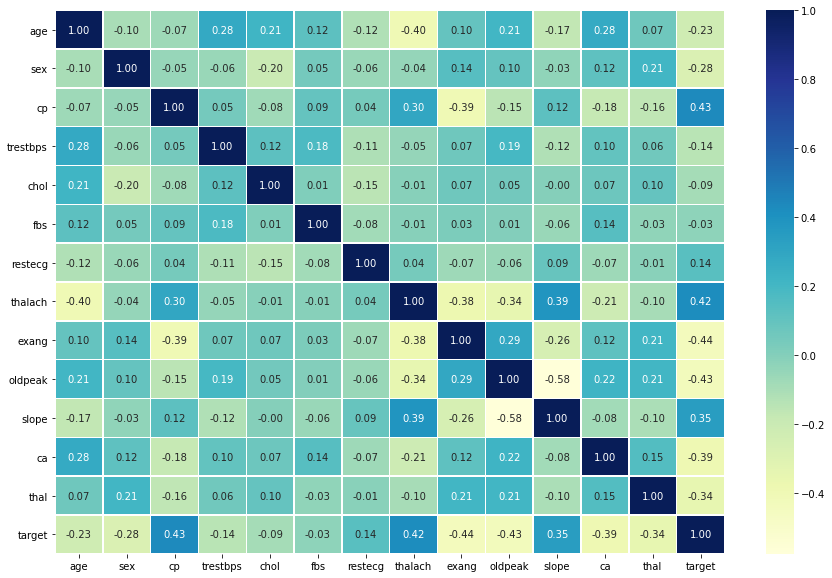

In [17]:
# Make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True,
                 linewidth=0.5,
                 fmt='.2f', 
                 cmap='YlGnBu')

plt.show()

## 5. Modeling

In [18]:
# split data between X and y
X = df.drop('target', axis=1)
y = df['target']

In [19]:
# split data intro train and test sets
np.random.seed(42)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# We're going to try three diferent machine learning models
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [21]:
# Put model in a dictionary
model = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(), 
         'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_scores(model, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : train labels
    y_test : test labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores ={}
    # Loop through models
    for name, model in model.items():
        # Fit the model to use the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [22]:
model_scores = fit_and_scores(model=model,
                              X_train=X_train,
                              X_test=X_test,
                              y_train=y_train,
                              y_test=y_test)

model_scores

C:\Users\jmedel\AppData\Local\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparation

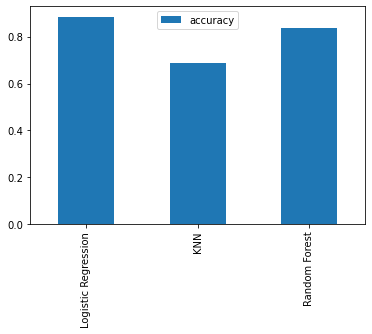

In [23]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.show()

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What sould we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter tunning

In [24]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different k_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the testing score list
    test_scores.append(knn.score(X_test, y_test))
    
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [25]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

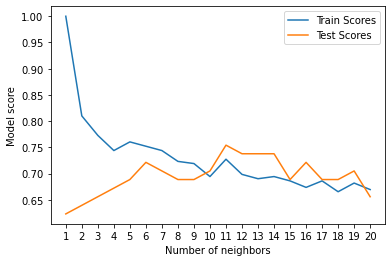

Maximun KKN score on the test data: 75.41 %


In [26]:
plt.plot(neighbors, train_scores, label='Train Scores')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.xticks(np.arange(1, 21, 1))
plt.legend()
plt.show()

print(f"Maximun KKN score on the test data: {np.max(test_scores)*100:.2f} %")

## Hyperparameter Tuning using RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassier()

... Using RandomizedSearchCV

In [27]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ['liblinear']}

# Create a hyperparameter a grid for RandomForestClassier()
rd_grid = {'n_estimators': np.arange(10, 1000, 50), 
           'max_depth': [None, 5, 10], 
           'min_samples_split': np.arange(2, 20, 2), 
           'min_samples_leaf': np.arange(1, 20, 2)}

Now we've got hyperparameters grids setup for each of our models, let's tune them using

RandomizedSearchCV

In [28]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameters search for LogisticRegression
rs_log_reg =  RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

# Fit random hyperparameters search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [31]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rd_grid, 
                           cv=5, 
                           n_iter=80, 
                           verbose=True)

# Fit random hyperparameters search model for RandomForestClassier()
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=80,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 13,
 'max_depth': None}

In [33]:
# Evaluate the randomized search RandomizeSearchCV model
rs_rf.score(X_test, y_test)

0.8360655737704918

## Hyperparameter Tunning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try  and improve them again using GridSearchCV

In [35]:
# Different hyperparameters for our LogisticRegression model
log_red_grid = {'C':np.logspace(-4, 4, 50), 
                'solver':['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_red_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.685113...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.18420699693267145, 'solver': 'liblinear'}

In [38]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluation our tunned machine learning model Classifier, beyond accuracy

* ROC Curve and AUC score
* Confusion Matrix
* Classification report
* Pression
* Recall
* F1-score

... and would be great if cross-validation was used where possible.

To make comparision and evaluate model our trained model, first we need to make predictions

In [40]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [41]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

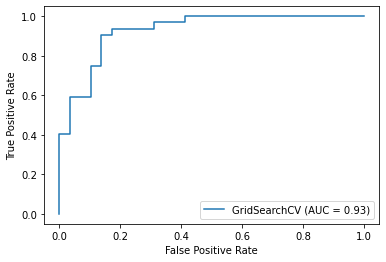

In [44]:
# Plot ROC curve and calculate the AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)
plt.show()

In [46]:
# Confusion Matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

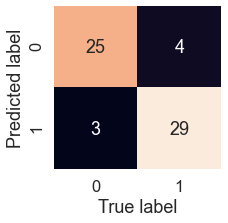

In [47]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and confusion metrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [48]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation metrics using `cross-validation`

We're going to calculate precission, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [50]:
# check the best hyperparameters

gs_log_reg.best_params_

{'C': 0.18420699693267145, 'solver': 'liblinear'}

In [53]:
# Create a new classifier with new parameters
clf = LogisticRegression(C=0.18420699693267145,
                         solver='liblinear')

In [59]:
# Cross-validation accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [65]:
# Cross-validation precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [66]:
# Cross-validation recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [67]:
# Cross-validation f1
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [70]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision':cv_precision,
                           'Recall':cv_recall,
                           'F1':cv_f1},
                          index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


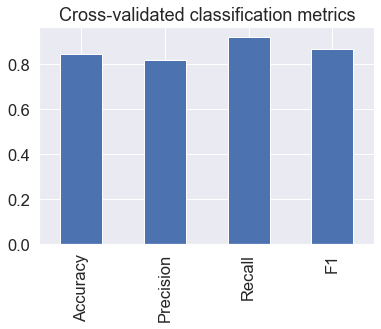

In [76]:
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False)
plt.show()

## Feature importance

Featre importance is anohter way of asking, "which features contributed most to  the outcomes of the model and how did they contribute?

Finding feature importance is differenct for each machine learning model.

Let's find the feature for our LogisticRegression()

In [78]:
# Fit an instance of LogisticRegression()
clf = LogisticRegression(C=0.18420699693267145,
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.18420699693267145, solver='liblinear')

In [79]:
clf.coef_

array([[ 0.00272617, -0.82401754,  0.64929651, -0.01155843, -0.00162876,
         0.03971111,  0.29840666,  0.02447397, -0.58189345, -0.56295346,
         0.43444928, -0.6247517 , -0.66150601]])

In [84]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0027261705291520564,
 'sex': -0.8240175354287939,
 'cp': 0.6492965139192888,
 'trestbps': -0.011558429261917323,
 'chol': -0.0016287631759933628,
 'fbs': 0.03971110671423688,
 'restecg': 0.29840665773729974,
 'thalach': 0.02447397489786257,
 'exang': -0.5818934473189328,
 'oldpeak': -0.5629534638411552,
 'slope': 0.43444927521385934,
 'ca': -0.6247517035138295,
 'thal': -0.6615060145582355}

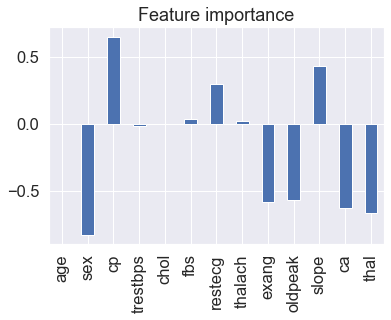

In [85]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature importance', legend=False)
plt.show()

In [86]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [87]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6.Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current model? (beyoud what we've done so far)
* If you model is good enough (you have it your evaluation metric) how would you import it and share it with others?